In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
net = pd.read_csv('datasets\\Internet-Demographic.csv')

In [3]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [4]:
net.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [5]:
net['Country Name'] = net['Country Name'].astype('category')
net['Country Code'] = net['Country Code'].astype('category')
net['Income Group'] = net['Income Group'].astype('category')

In [6]:
net.dtypes

Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<h1>No. 1 </h1>

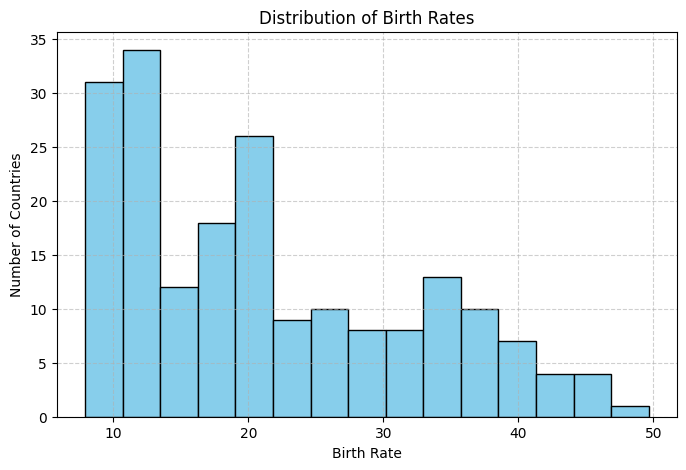

In [7]:
plt.figure(figsize=(8,5))
plt.hist(net["Birth rate"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("Birth Rate")
plt.ylabel("Number of Countries")
plt.title("Distribution of Birth Rates")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<h1> INSIGHT – Most countries have moderate birth rates, but a few have very high birth rates.</h1>

<h1>No 2. Top 5</h1>

In [8]:
net['Internet users'].mean()
net1 = net[net['Internet users'] > 42]
net1['Internet users'].mean()
net2 = net1[net1['Internet users'] > 67]
net2['Internet users'].mean()

net3 = net2[net2['Internet users'] > 94]
net3

,Country Name,Country Code,Birth rate,Internet users,Income Group
22,Bermuda,BMU,10.4,95.3000,High income
47,Denmark,DNK,10.0,94.6297,High income
84,Iceland,ISL,13.4,96.5468,High income
131,Norway,NOR,11.6,95.0534,High income
163,Sweden,SWE,11.8,94.7836,High income


<h1>INSIGHT -  these are countries that has a highest internet usage [Bermuda, Denmark, Iceland, Norway, Sweden] that is above 94% .</h1>

<h1>No 3.  Count of Countries by Income Group</h1>

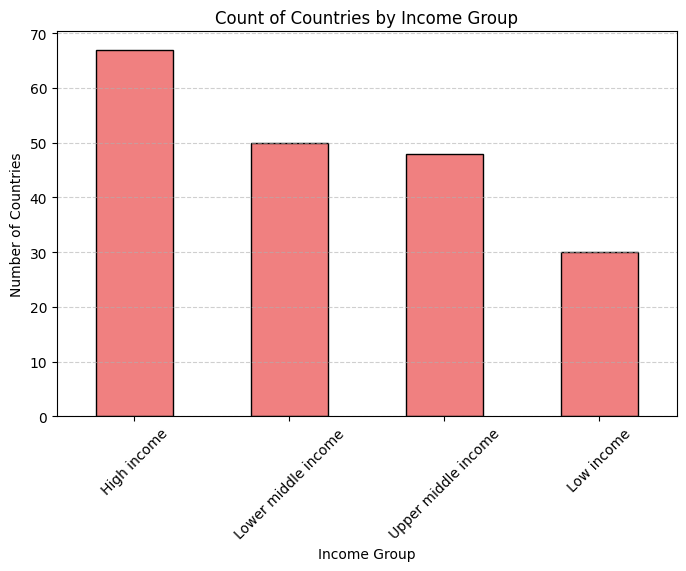

In [17]:
income_group_counts = net["Income Group"].value_counts()
plt.figure(figsize=(8,5))
income_group_counts.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.xlabel("Income Group")
plt.ylabel("Number of Countries")
plt.title("Count of Countries by Income Group")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

<h1>Insight: High-income and upper-middle-income countries are more prevalent, while low-income countries are fewer.
</h1>

<h1>No 4.  Box Plot of Internet Usage </h1>

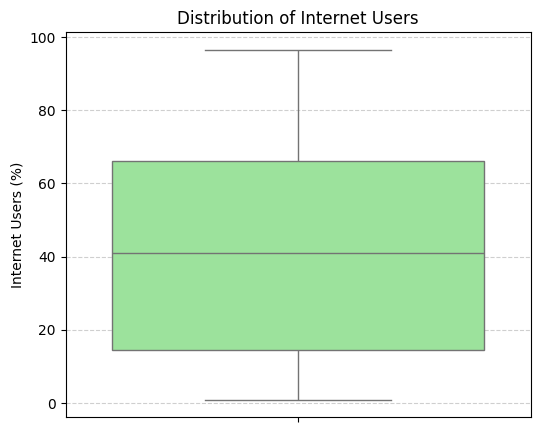

In [18]:
plt.figure(figsize=(6,5))
sns.boxplot(y=net["Internet users"], color="lightgreen")
plt.ylabel("Internet Users (%)")
plt.title("Distribution of Internet Users")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


<h1>Insight: Internet usage varies widely, with some countries having near-total penetration while others have very low access.
</h1>

<h1>No 5.  Countries with No Internet Access</h1>

In [25]:
no_internet = net[net["Internet users"] == 0][["Country Name"]]
print(no_internet)

Empty DataFrame
Columns: [Country Name]
Index: []


<h1> Insight: No country in the dataset has 0% internet usage, indicating at least minimal internet penetration everywhere.
</h1>

<h1>No 6.  Average Birth Rate</h1>

In [20]:
average_birth_rate = net["Birth rate"].mean()
print("Average Birth Rate:", average_birth_rate)

Average Birth Rate: 21.469928205128202


<h1>Insight: The average birth rate across all countries suggests a moderate global birth rate, with some countries significantly above or below this level.
</h1>

<h1>No 7. Scatter Plot - Birth Rate vs. Internet Usage</h1>

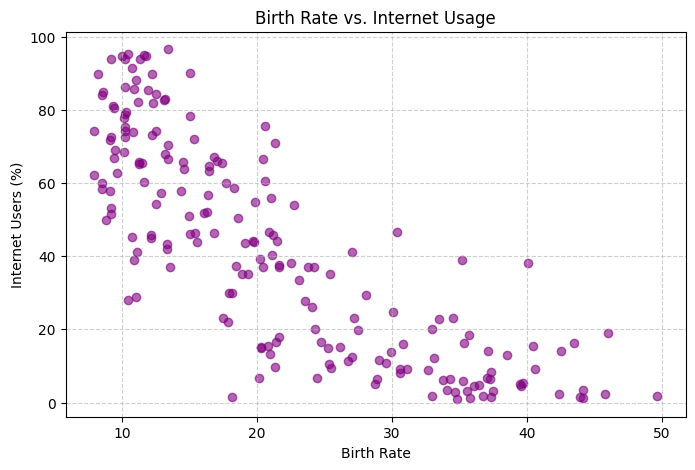

In [21]:

plt.figure(figsize=(8,5))
plt.scatter(net["Birth rate"], net["Internet users"], color="purple", alpha=0.6)
plt.xlabel("Birth Rate")
plt.ylabel("Internet Users (%)")
plt.title("Birth Rate vs. Internet Usage")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<h1>Insight: There is an inverse relationship between birth rate and internet usage, where higher internet penetration often corresponds to lower birth rates.
</h1>

<h1>No 8. Countries with Birth Rates Above 40</h1>

In [22]:
high_birth_rate_countries = net[net["Birth rate"] > 40][["Country Name", "Birth rate"]]
print(high_birth_rate_countries)

         Country Name  Birth rate
2              Angola      45.985
11            Burundi      44.151
14       Burkina Faso      40.551
65        Gambia, The      42.525
115              Mali      44.138
127             Niger      49.661
128           Nigeria      40.045
156           Somalia      43.891
167              Chad      45.745
178            Uganda      43.474
192  Congo, Dem. Rep.      42.394
193            Zambia      40.471


<h1> Insight: These countries, mostly in Africa, have high birth rates, often due to lower access to contraception and higher fertility rates.
</h1>

<h1>No 9. Pie Chart of Income Groups</h1>

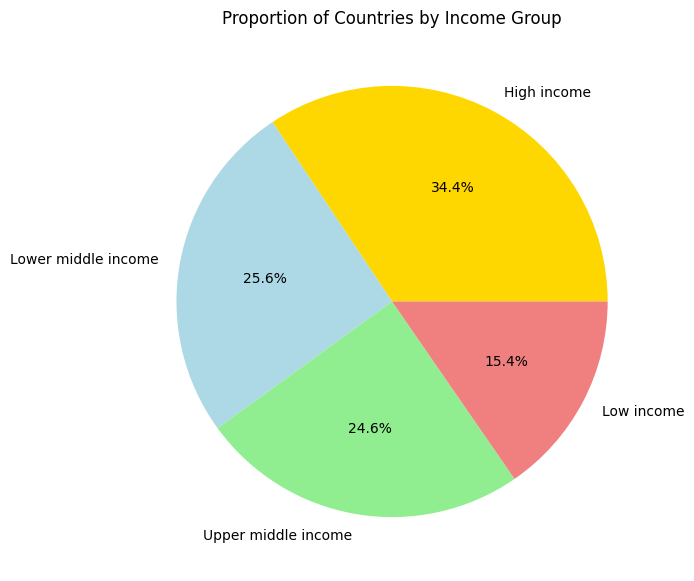

In [26]:
plt.figure(figsize=(7,7))
income_group_counts.plot(kind="pie", autopct="%1.1f%%", colors=["gold", "lightblue", "lightgreen", "lightcoral"])
plt.ylabel("")  
plt.title("Proportion of Countries by Income Group")
plt.show()

<h1>Insight: The proportion of income groups highlights economic disparities, with high-income countries forming a smaller fraction compared to other groups.
</h1>

<h1>No 10. Correlation Between Birth Rate and Internet Users</h1>

In [24]:
correlation = net["Birth rate"].corr(net["Internet users"])
print("Correlation between Birth Rate and Internet Usage:", correlation)

Correlation between Birth Rate and Internet Usage: -0.8155885551284765


<h1>Insight: The correlation between birth rate and internet usage is negative, meaning that as internet penetration increases, birth rates tend to decrease.
</h1>